<a id = 'title'></a>
# Hooked on Books: A Deeper Dive into Feature Engineering

**Author:** Quinci Birker

## Introduction

In this notebook, we delve deeper into feature engineering, building upon the groundwork laid in the initial notebook. Despite implementing advanced models, Random Forest Classifier, and XGBoost, the performance metrics, including accuracy, remained suboptimal. 
The goal of this notebook is to continue feature engineering steps to hopefully see better results in the modeling process. 

### Current Project Status:
The project has progressed through several crucial stages:
- **Exploratory Data Analysis (EDA)**: Conducted a thorough examination of the dataset to understand underlying patterns and relationships.
- **Data Cleaning**: The dataset has been cleaned of inconsistencies and missing values, ensuring the quality of the data.
- **Preprocessing**: Transformed raw data into an appropriate format, making it suitable for modeling.
- **Data Engineering**: New features have been created and existing ones modified to better capture the nuances of the dataset.
- **Baseline & Advanced Modeling**: Applied Logisitc Regression, Random Forest Classifier, and XGBoost models to the original and engineered features.
- **Metrics Review**: The performance of the models has been assessed using key metrics, such as accuracy, recall, precision, and f-1 scores.

With this foundation, we now turn our attention back to feature engineering. The objective is to iteratively refine the features and models to achieve a better performance.

## Table of Contents

---------------------------------------
1. [Data Dictionary](#dictionary)
2. [Import Dataset and Libraries](#import)
3. [Feature Engineering](#preprocessing) 
     - 3.1 [Genres Column - Count number of unique genres](#gc)
     - 3.2 [Rating Column - Transform to binary colum](#rc) 
     - 3.3 [Data Splitting - Train/Test Split](#ds)
     - 3.4 [Publisher Column - Taking Top Publishers](#PC)
     - 3.4 [Genres Column - Create new genres column](#gc2)
     - 3.5 [Description Column - Text Preprocessing](#DC)
4. [Random Forest Classifier](#RFC)
5. [Summary & Insights](#summary)
---------------------------------------

<a id = 'dictionary'></a>
## Data Dictionary 

Below is the data dictionary after cleaning and performing some preprocessing. Note that some columns have been dropped from the orginial dataset.

| Features       | Description                                                   |
|----------------|---------------------------------------------------------------|
| title          | The title of the book.                                         |
| series         | The series to which the book belongs, if any.                  |
| author         | The author of the book.                                        |
| description    | A brief description or synopsis of the book.                   |
| genres         | The genre or categories the book falls under.                  |
| pages          | The number of pages in the book.                               |
| publisher      | The publisher of the book.                                     |
| publishDate    | The publication date of the book.                              |
| numRatings     | The number of ratings the book has received.                   |
| likedPercent   | The percentage of readers who liked the book.                  |
| bbeScore       | The book's score on the Best Books Ever list.                  |
| year           | The year the book was published.                               |
| month          | The month the book was published.                              |
| series_bool    | A binary indicator of whether the book is part of a series (1) or not (0). |

| Target Variable | Description                                                   |
|-----------------|---------------------------------------------------------------|
| rating          | The book's rating, indicating 1 for a good rating and 0 for not a good rating. |

<a id = 'import'></a>
## Import Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Read in the cleaned dataset
df = pd.read_csv('data/GoodReads_Dataset_cleaned.csv', index_col=0) # keep original index
pd.set_option('display.max_columns', None) # show all columns
df.head()

,title,series,author,rating,description,genres,pages,publisher,publishDate,numRatings,likedPercent,bbeScore,year,month,series_bool
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374.0,Scholastic Press,2008-09-14 00:00:00.000000000,6376780,96.0,2993816,2008,9,1
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870.0,Scholastic Inc.,2004-09-28 00:00:00.000000000,2507623,98.0,2632233,2004,9,1
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",324.0,Harper Perennial Modern Classics,2006-05-23 00:00:00.000000000,4501075,95.0,2269402,2006,5,1
3,Pride and Prejudice,unknown,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,"['Classics', 'Fiction', 'Romance', 'Historical...",279.0,Modern Library,2000-10-10 00:00:00.000000000,2998241,94.0,1983116,2000,10,0
4,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",501.0,"Little, Brown and Company",2006-09-06 00:00:00.000000000,4964519,78.0,1459448,2006,9,1


<a id = 'preprocessing'></a>
## Feature Engineering

<a id = 'gc'></a>
##### 2.1 Create an additional column that holds the count of genres

In [3]:
# Create a new column that counts the number of genres in the list
df['genre_count'] = df['genres'].apply(lambda x: len(x))

# Sanity Check 
df.head(3)

,title,series,author,rating,description,genres,pages,publisher,publishDate,numRatings,likedPercent,bbeScore,year,month,series_bool,genre_count
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374.0,Scholastic Press,2008-09-14 00:00:00.000000000,6376780,96.0,2993816,2008,9,1,130
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870.0,Scholastic Inc.,2004-09-28 00:00:00.000000000,2507623,98.0,2632233,2004,9,1,140
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",324.0,Harper Perennial Modern Classics,2006-05-23 00:00:00.000000000,4501075,95.0,2269402,2006,5,1,142


The count of genres may increase the rating score. A book with 15 or more genres might stand out more compared to a book with less genres.

<a id = 'rc'></a>
##### 2.2 Transform the rating column into a binary column

Assumtion: A rating above 4.0 will be considered a good rating with a value of 1, and a rating of 4.0 and below will be considered a bad rating with a value of 0.

I chose to create a threshold at 4 since this is the middle of the distribution and I think any book with a rating higher than 4.0 could be considered very good. 

In [4]:
# Define the threshold
threshold = 4.0

# Create binary column
df['rating'] = (df['rating'] > threshold).astype(int)

In [5]:
# Check the count of 1's vs 0's 
df['rating'].value_counts()

rating
1    21464
0    19838
Name: count, dtype: int64

In [6]:
# Check the ratio of 1's vs 0's
df['rating'].value_counts(normalize=True)

rating
1    0.519684
0    0.480316
Name: proportion, dtype: float64

There seems to be a very small imbalance in the target variable, around 52 percent of the ratings are considered a 1 and 48 percent are considered a 0. 

In [7]:
# Sanity check 
df.head()

,title,series,author,rating,description,genres,pages,publisher,publishDate,numRatings,likedPercent,bbeScore,year,month,series_bool,genre_count
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,1,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374.0,Scholastic Press,2008-09-14 00:00:00.000000000,6376780,96.0,2993816,2008,9,1,130
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",1,There is a door at the end of a silent corrido...,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870.0,Scholastic Inc.,2004-09-28 00:00:00.000000000,2507623,98.0,2632233,2004,9,1,140
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,1,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",324.0,Harper Perennial Modern Classics,2006-05-23 00:00:00.000000000,4501075,95.0,2269402,2006,5,1,142
3,Pride and Prejudice,unknown,"Jane Austen, Anna Quindlen (Introduction)",1,Alternate cover edition of ISBN 9780679783268S...,"['Classics', 'Fiction', 'Romance', 'Historical...",279.0,Modern Library,2000-10-10 00:00:00.000000000,2998241,94.0,1983116,2000,10,0,147
4,Twilight,The Twilight Saga #1,Stephenie Meyer,0,About three things I was absolutely positive.\...,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",501.0,"Little, Brown and Company",2006-09-06 00:00:00.000000000,4964519,78.0,1459448,2006,9,1,137


<a id = 'ds'></a>
##### 2.3 Data Splitting - Train/Test Split

In [8]:
# Define X and y variables
X = df.drop('rating', axis=1)
y = df['rating']

In [9]:
# Check the shape of X and y
print(X.shape),
print(y.shape)

(41302, 15)
(41302,)


In [10]:
# split the X and y into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=55)

In [11]:
# Check the shape of train and test sets
print(X_train.shape),
print(y_train.shape),
print(X_test.shape),
print(y_test.shape)

(33041, 15)
(33041,)
(8261, 15)
(8261,)


The shape of the train and test look good. 

In [12]:
# Check that 'genres' is one of the columns in X_train
print('genres' in X_train.columns)

True


<a id = 'PC'></a>
##### 2.4 Publisher Column

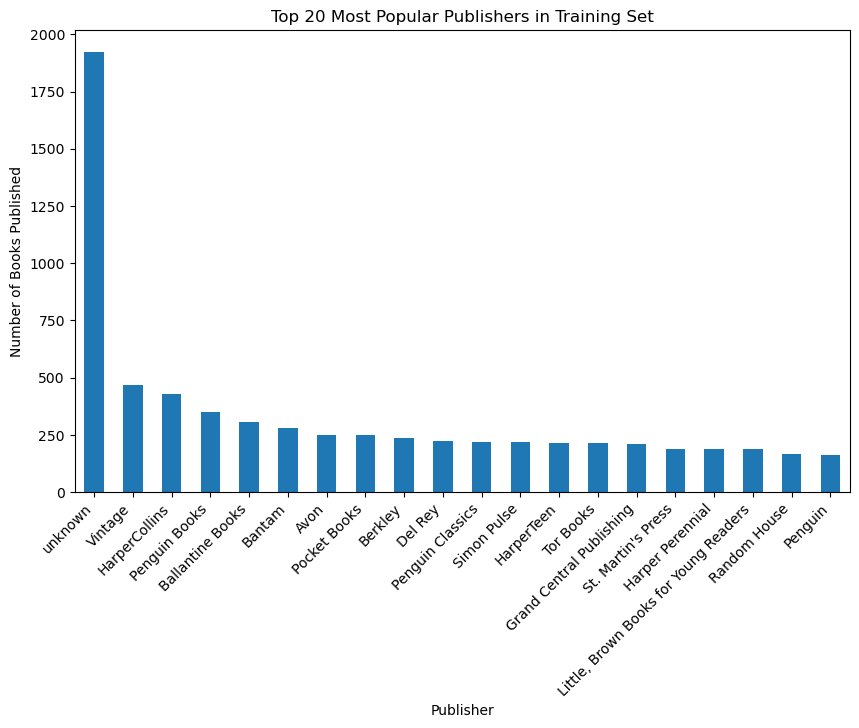

In [13]:
# Calculate the number of books each publisher has published in the training set
publisher_popularity_train = X_train['publisher'].value_counts()

# Visualize the top 20 publishers from the training set
top_20_publishers = publisher_popularity_train.head(20)
top_20_publishers.plot(kind='bar', figsize=(10,6))

plt.title('Top 20 Most Popular Publishers in Training Set')
plt.xlabel('Publisher')
plt.ylabel('Number of Books Published')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()

In [14]:
# Identify the top 20 publishers in the training set
top_20_publishers = X_train['publisher'].value_counts().head(20).index

# Function to one-hot encode the top publishers
def encode_top_publishers(df, top_publishers):
    for publisher in top_publishers:
        df['publisher_' + publisher] = (df['publisher'] == publisher).astype(int)
    return df

# Apply the function to both training and testing sets
X_train = encode_top_publishers(X_train, top_20_publishers)
X_test = encode_top_publishers(X_test, top_20_publishers)

# Check X_train 
X_train.head()

,title,series,author,description,genres,pages,publisher,publishDate,numRatings,likedPercent,bbeScore,year,month,series_bool,genre_count,publisher_unknown,publisher_Vintage,publisher_HarperCollins,publisher_Penguin Books,publisher_Ballantine Books,publisher_Bantam,publisher_Avon,publisher_Pocket Books,publisher_Berkley,publisher_Del Rey,publisher_Penguin Classics,publisher_Simon Pulse,publisher_HarperTeen,publisher_Tor Books,publisher_Grand Central Publishing,publisher_St. Martin's Press,publisher_Harper Perennial,"publisher_Little, Brown Books for Young Readers",publisher_Random House,publisher_Penguin
35783,Winnie-the-Pooh Meets Gopher (Little Golden Book),unknown,"A.A. Milne, George Desantis (Adaptor)",Please don't delete. This edition doesn't have...,"['Childrens', 'Picture Books', 'Fiction', 'Ani...",22.0,Golden Press,1974-01-01 00:00:00.000000000,666,97.0,89,1974,1,0,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39773,Symmetry,unknown,Hermann Weyl,Symmetry is a classic study of symmetry in mat...,"['Science', 'Mathematics', 'Physics', 'Nonfict...",176.0,Princeton University Press,1983-01-21 00:00:00.000000000,161,93.0,83,1983,1,0,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51074,"Broken Hearts, Fences, and Other Things to Mend",Broken Hearts & Revenge #1,Katie Finn (Goodreads Author),Hot sun. Blue waves. New romances. Old secrets...,"['Contemporary', 'Young Adult', 'Romance', 'Ch...",339.0,Feiwel & Friends,2014-05-13 00:00:00.000000000,2535,87.0,24,2014,5,1,171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7233,All You Need Is Kill,unknown,"Hiroshi Sakurazaka, Alexander O. Smith (Transl...",There’s one thing worse than dying. It’s comin...,"['Science Fiction', 'Fiction', 'Time Travel', ...",201.0,Haikasoru,2009-07-21 00:00:00.000000000,17367,96.0,370,2009,7,0,139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6868,Talking as Fast as I Can: From Gilmore Girls t...,unknown,Lauren Graham,"In this collection of personal essays, the bel...","['Nonfiction', 'Memoir', 'Audiobook', 'Biograp...",224.0,Ballantine Books,2016-11-29 00:00:00.000000000,94434,95.0,389,2016,11,0,125,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<a id = 'gc2'></a>
##### 2.5 Dealing with the genres column

Currently, the genres column is in a list format, with some rows having multiple genres. 

To do:

- Seperate the genres
- Decide which genres to keep
- Create dummy variables for the top genres
- Create one additional column for any rows that don't include any of the top 30 genres and the 9 percent of null values with 'Unknown'

##### Create a Multi Label Binarizer for train dataset

In [15]:
from collections import Counter
import ast

# Convert string representation of lists to actual lists
X_train['genres'] = X_train['genres'].apply(lambda x: ast.literal_eval(x))

# Assuming 'genres' in X_train are lists of genres
all_genres = [genre for sublist in X_train['genres'] for genre in sublist]
genre_counts = Counter(all_genres)

# Get the top 30 genres
top_30_genres = [genre for genre, count in genre_counts.most_common(30)]

X_train['genres'] = X_train['genres'].apply(lambda genres: [genre if genre in top_30_genres else 'Other' for genre in genres])

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

X_train_df = X_train.join(
    pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(X_train.pop('genres')),
        index=X_train.index,
        columns=['genre_' + genre for genre in mlb.classes_])
)

In [17]:
X_train_df.head()

,title,series,author,description,pages,publisher,publishDate,numRatings,likedPercent,bbeScore,year,month,series_bool,genre_count,publisher_unknown,publisher_Vintage,publisher_HarperCollins,publisher_Penguin Books,publisher_Ballantine Books,publisher_Bantam,publisher_Avon,publisher_Pocket Books,publisher_Berkley,publisher_Del Rey,publisher_Penguin Classics,publisher_Simon Pulse,publisher_HarperTeen,publisher_Tor Books,publisher_Grand Central Publishing,publisher_St. Martin's Press,publisher_Harper Perennial,"publisher_Little, Brown Books for Young Readers",publisher_Random House,publisher_Penguin,genre_Adult,genre_Adventure,genre_Audiobook,genre_Chick Lit,genre_Childrens,genre_Classics,genre_Contemporary,genre_Contemporary Romance,genre_Crime,genre_Fantasy,genre_Fiction,genre_Historical,genre_Historical Fiction,genre_History,genre_Humor,genre_Literature,genre_Magic,genre_Middle Grade,genre_Mystery,genre_Nonfiction,genre_Novels,genre_Other,genre_Paranormal,genre_Romance,genre_Science Fiction,genre_Science Fiction Fantasy,genre_Supernatural,genre_Suspense,genre_Thriller,genre_Urban Fantasy,genre_Young Adult
35783,Winnie-the-Pooh Meets Gopher (Little Golden Book),unknown,"A.A. Milne, George Desantis (Adaptor)",Please don't delete. This edition doesn't have...,22.0,Golden Press,1974-01-01 00:00:00.000000000,666,97.0,89,1974,1,0,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
39773,Symmetry,unknown,Hermann Weyl,Symmetry is a classic study of symmetry in mat...,176.0,Princeton University Press,1983-01-21 00:00:00.000000000,161,93.0,83,1983,1,0,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
51074,"Broken Hearts, Fences, and Other Things to Mend",Broken Hearts & Revenge #1,Katie Finn (Goodreads Author),Hot sun. Blue waves. New romances. Old secrets...,339.0,Feiwel & Friends,2014-05-13 00:00:00.000000000,2535,87.0,24,2014,5,1,171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
7233,All You Need Is Kill,unknown,"Hiroshi Sakurazaka, Alexander O. Smith (Transl...",There’s one thing worse than dying. It’s comin...,201.0,Haikasoru,2009-07-21 00:00:00.000000000,17367,96.0,370,2009,7,0,139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
6868,Talking as Fast as I Can: From Gilmore Girls t...,unknown,Lauren Graham,"In this collection of personal essays, the bel...",224.0,Ballantine Books,2016-11-29 00:00:00.000000000,94434,95.0,389,2016,11,0,125,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [18]:
# Check shape
X_train_df.shape

(33041, 65)

##### Create a Multi Label Binarizer for test dataset

In [19]:
# Filter genres in X_test to top 30 or 'Other'
X_test['genres'] = X_test['genres'].apply(lambda genres: [genre if genre in top_30_genres else 'Other' for genre in genres])

# Transform 'genres' in X_test using the already fitted mlb
X_test_genres_transformed = mlb.transform(X_test.pop('genres'))

# Create a DataFrame from the transformed 'genres' data
X_test_df = X_test.join(
    pd.DataFrame.sparse.from_spmatrix(
        X_test_genres_transformed,
        index=X_test.index,
        columns=['genre_' + genre for genre in mlb.classes_])   
)

In [20]:
X_test_df.head()

,title,series,author,description,pages,publisher,publishDate,numRatings,likedPercent,bbeScore,year,month,series_bool,genre_count,publisher_unknown,publisher_Vintage,publisher_HarperCollins,publisher_Penguin Books,publisher_Ballantine Books,publisher_Bantam,publisher_Avon,publisher_Pocket Books,publisher_Berkley,publisher_Del Rey,publisher_Penguin Classics,publisher_Simon Pulse,publisher_HarperTeen,publisher_Tor Books,publisher_Grand Central Publishing,publisher_St. Martin's Press,publisher_Harper Perennial,"publisher_Little, Brown Books for Young Readers",publisher_Random House,publisher_Penguin,genre_Adult,genre_Adventure,genre_Audiobook,genre_Chick Lit,genre_Childrens,genre_Classics,genre_Contemporary,genre_Contemporary Romance,genre_Crime,genre_Fantasy,genre_Fiction,genre_Historical,genre_Historical Fiction,genre_History,genre_Humor,genre_Literature,genre_Magic,genre_Middle Grade,genre_Mystery,genre_Nonfiction,genre_Novels,genre_Other,genre_Paranormal,genre_Romance,genre_Science Fiction,genre_Science Fiction Fantasy,genre_Supernatural,genre_Suspense,genre_Thriller,genre_Urban Fantasy,genre_Young Adult
33489,Shades of Doon,Doon #3,"Carey Corp (Goodreads Author), Lorie Langdon (...","After cheating death, Veronica Welling is dete...",346.0,Blink,2015-09-01 00:00:00.000000000,1864,95.0,92,2015,9,1,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
12086,A Murder of Quality,George Smiley #2,John le Carré,John le Carré's classic novels deftly navigate...,160.0,Scribner,2002-01-29 00:00:00.000000000,12646,93.0,194,2002,1,1,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8714,Serpent & Dove,Serpent & Dove #1,ShelMahurin (Goodreads Author),This is a previously published edition of ISBN...,513.0,HarperTeen,2019-09-03 00:00:00.000000000,62049,93.0,289,2019,9,1,131,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
36527,American Icon: Alan Mulally and the Fight to S...,unknown,Bryce G. Hoffman,THE INSIDE STORY OF THE EPIC TURNAROUND OF FOR...,432.0,Crown Business,2012-03-13 00:00:00.000000000,3347,98.0,88,2012,3,0,127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
12745,Broken Embrace,Embrace #3,Dana Mason (Goodreads Author),"\n The Past…\nAs childhood sweethearts, Brian...",345.0,Dana Mason,2014-06-05 00:00:00.000000000,115,87.0,190,2014,6,1,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [21]:
# Check shape
X_test_df.shape

(8261, 65)

<a id = 'DC'></a>
##### 2.6 Description Column - Text Preprocessing with TF-IDF Vectorization

In [22]:
stemmer = PorterStemmer()
ENG_STOP_WORDS = stopwords.words('english')

def my_tokenizer(description):
    # Replace punctuation with empty string and convert to lower case
    for punctuation_mark in string.punctuation:
        description = description.replace(punctuation_mark, '').lower()
    
    listofwords = description.split(' ')
    listofstemmed_words = []
    
    # Stem words that are not stop words and are not empty
    for word in listofwords:
        if (not word in ENG_STOP_WORDS) and (word != ''):
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)
            
    return listofstemmed_words

In [23]:
# Instantiate, fit, transform vectorizer
vectorizer = TfidfVectorizer(tokenizer=my_tokenizer, min_df=10, max_features=400)
vectorizer = vectorizer.fit(X_train_df['description'])
train_vec = vectorizer.transform(X_train_df['description'])
test_vec = vectorizer.transform(X_test_df['description'])

/Users/quincibirker/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [24]:
print(train_vec.shape, test_vec.shape)

(33041, 400) (8261, 400)


In [25]:
feature_names = vectorizer.get_feature_names_out()

# Create DataFrames with the correct column names
train_vec_df = pd.DataFrame(train_vec.toarray(), columns=[f'desc_{col}' for col in feature_names])
test_vec_df = pd.DataFrame(test_vec.toarray(), columns=[f'desc_{col}' for col in feature_names])

In [26]:
X_train = pd.concat([X_train_df.reset_index(drop=True), train_vec_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test_df.reset_index(drop=True), test_vec_df.reset_index(drop=True)], axis=1)

In [27]:
X_train.head()

,title,series,author,description,pages,publisher,publishDate,numRatings,likedPercent,bbeScore,year,month,series_bool,genre_count,publisher_unknown,publisher_Vintage,publisher_HarperCollins,publisher_Penguin Books,publisher_Ballantine Books,publisher_Bantam,publisher_Avon,publisher_Pocket Books,publisher_Berkley,publisher_Del Rey,publisher_Penguin Classics,publisher_Simon Pulse,publisher_HarperTeen,publisher_Tor Books,publisher_Grand Central Publishing,publisher_St. Martin's Press,publisher_Harper Perennial,"publisher_Little, Brown Books for Young Readers",publisher_Random House,publisher_Penguin,genre_Adult,genre_Adventure,genre_Audiobook,genre_Chick Lit,genre_Childrens,genre_Classics,genre_Contemporary,genre_Contemporary Romance,genre_Crime,genre_Fantasy,genre_Fiction,genre_Historical,genre_Historical Fiction,genre_History,genre_Humor,genre_Literature,genre_Magic,genre_Middle Grade,genre_Mystery,genre_Nonfiction,genre_Novels,genre_Other,genre_Paranormal,genre_Romance,genre_Science Fiction,genre_Science Fiction Fantasy,genre_Supernatural,genre_Suspense,genre_Thriller,genre_Urban Fantasy,genre_Young Adult,desc_\n,desc_across,desc_adventur,desc_age,desc_ago,desc_alon,desc_along,desc_also,desc_alway,desc_america,desc_american,desc_among,desc_ancient,desc_angel,desc_anoth,desc_answer,desc_anyon,desc_anyth,desc_apart,desc_appear,desc_around,desc_arriv,desc_art,desc_ask,desc_author,desc_away,desc_back,desc_bad,desc_battl,desc_beauti,desc_becom,desc_begin,desc_behind,desc_believ,desc_belov,desc_best,desc_bestsel,desc_better,desc_beyond,desc_big,desc_black,desc_blood,desc_bodi,desc_book,desc_born,desc_boy,desc_break,desc_bring,desc_brother,desc_busi,desc_call,desc_cant,desc_care,desc_case,desc_centuri,desc_challeng,desc_chanc,desc_chang,desc_charact,desc_child,desc_children,desc_choic,desc_citi,desc_classic,desc_close,desc_collect,desc_come,desc_commun,desc_complet,desc_continu,desc_control,desc_could,desc_countri,desc_cover,desc_creat,desc_crime,desc_cultur,desc_danger,desc_dark,desc_daughter,desc_day,desc_de,desc_dead,desc_deadli,desc_death,desc_decid,desc_deep,desc_demon,desc_desir,desc_desper,desc_destroy,desc_determin,desc_die,desc_differ,desc_discov,desc_doesnt,desc_draw,desc_dream,desc_earth,desc_edit,desc_emot,desc_end,desc_enemi,desc_enough,desc_entir,desc_escap,desc_even,desc_event,desc_ever,desc_everi,desc_everyon,desc_everyth,desc_evil,desc_exist,desc_expect,desc_experi,desc_explor,desc_extraordinari,desc_eye,desc_face,desc_faith,desc_fall,desc_famili,desc_fan,desc_far,desc_fate,desc_father,desc_fear,desc_feel,desc_fiction,desc_fight,desc_final,desc_find,desc_first,desc_five,desc_follow,desc_forc,desc_forev,desc_form,desc_found,desc_four,desc_friend,desc_friendship,desc_full,desc_futur,desc_game,desc_gener,desc_get,desc_gift,desc_girl,desc_give,desc_go,desc_god,desc_good,desc_great,desc_greatest,desc_group,desc_grow,desc_hand,desc_happen,desc_happi,desc_hard,desc_haunt,desc_he,desc_head,desc_heart,desc_help,desc_hero,desc_he’,desc_hide,desc_high,desc_histori,desc_hold,desc_home,desc_hope,desc_hous,desc_human,desc_husband,desc_idea,desc_imagin,desc_import,desc_includ,desc_insid,desc_inspir,desc_investig,desc_island,desc_it’,desc_job,desc_john,desc_join,desc_journey,desc_keep,desc_kill,desc_killer,desc_kind,desc_king,desc_know,desc_known,desc_land,desc_last,desc_later,desc_lead,desc_learn,desc_leav,desc_left,desc_let,desc_lie,desc_life,desc_light,desc_like,desc_littl,desc_live,desc_london,desc_long,desc_look,desc_lose,desc_lost,desc_love,desc_made,desc_magic,desc_make,desc_man,desc_mani,desc_marri,desc_marriag,desc_master,desc_matter,desc_may,desc_mean,desc_meet,desc_memori,desc_men,desc_might,desc_mind,desc_miss,desc_mission,desc_modern,desc_moment,desc_mother,desc_move,desc_much,desc_murder,desc_must,desc_mysteri,desc_name,desc_nation,desc_natur,desc_need,desc_never,desc_new,desc_next,desc_night,desc_noth,desc_novel,desc_offer,desc_old,desc_one,desc_open,desc_order,desc_origin,desc_other,desc_pain,desc_parent,desc_part,des

In [28]:
X_test.head()

,title,series,author,description,pages,publisher,publishDate,numRatings,likedPercent,bbeScore,year,month,series_bool,genre_count,publisher_unknown,publisher_Vintage,publisher_HarperCollins,publisher_Penguin Books,publisher_Ballantine Books,publisher_Bantam,publisher_Avon,publisher_Pocket Books,publisher_Berkley,publisher_Del Rey,publisher_Penguin Classics,publisher_Simon Pulse,publisher_HarperTeen,publisher_Tor Books,publisher_Grand Central Publishing,publisher_St. Martin's Press,publisher_Harper Perennial,"publisher_Little, Brown Books for Young Readers",publisher_Random House,publisher_Penguin,genre_Adult,genre_Adventure,genre_Audiobook,genre_Chick Lit,genre_Childrens,genre_Classics,genre_Contemporary,genre_Contemporary Romance,genre_Crime,genre_Fantasy,genre_Fiction,genre_Historical,genre_Historical Fiction,genre_History,genre_Humor,genre_Literature,genre_Magic,genre_Middle Grade,genre_Mystery,genre_Nonfiction,genre_Novels,genre_Other,genre_Paranormal,genre_Romance,genre_Science Fiction,genre_Science Fiction Fantasy,genre_Supernatural,genre_Suspense,genre_Thriller,genre_Urban Fantasy,genre_Young Adult,desc_\n,desc_across,desc_adventur,desc_age,desc_ago,desc_alon,desc_along,desc_also,desc_alway,desc_america,desc_american,desc_among,desc_ancient,desc_angel,desc_anoth,desc_answer,desc_anyon,desc_anyth,desc_apart,desc_appear,desc_around,desc_arriv,desc_art,desc_ask,desc_author,desc_away,desc_back,desc_bad,desc_battl,desc_beauti,desc_becom,desc_begin,desc_behind,desc_believ,desc_belov,desc_best,desc_bestsel,desc_better,desc_beyond,desc_big,desc_black,desc_blood,desc_bodi,desc_book,desc_born,desc_boy,desc_break,desc_bring,desc_brother,desc_busi,desc_call,desc_cant,desc_care,desc_case,desc_centuri,desc_challeng,desc_chanc,desc_chang,desc_charact,desc_child,desc_children,desc_choic,desc_citi,desc_classic,desc_close,desc_collect,desc_come,desc_commun,desc_complet,desc_continu,desc_control,desc_could,desc_countri,desc_cover,desc_creat,desc_crime,desc_cultur,desc_danger,desc_dark,desc_daughter,desc_day,desc_de,desc_dead,desc_deadli,desc_death,desc_decid,desc_deep,desc_demon,desc_desir,desc_desper,desc_destroy,desc_determin,desc_die,desc_differ,desc_discov,desc_doesnt,desc_draw,desc_dream,desc_earth,desc_edit,desc_emot,desc_end,desc_enemi,desc_enough,desc_entir,desc_escap,desc_even,desc_event,desc_ever,desc_everi,desc_everyon,desc_everyth,desc_evil,desc_exist,desc_expect,desc_experi,desc_explor,desc_extraordinari,desc_eye,desc_face,desc_faith,desc_fall,desc_famili,desc_fan,desc_far,desc_fate,desc_father,desc_fear,desc_feel,desc_fiction,desc_fight,desc_final,desc_find,desc_first,desc_five,desc_follow,desc_forc,desc_forev,desc_form,desc_found,desc_four,desc_friend,desc_friendship,desc_full,desc_futur,desc_game,desc_gener,desc_get,desc_gift,desc_girl,desc_give,desc_go,desc_god,desc_good,desc_great,desc_greatest,desc_group,desc_grow,desc_hand,desc_happen,desc_happi,desc_hard,desc_haunt,desc_he,desc_head,desc_heart,desc_help,desc_hero,desc_he’,desc_hide,desc_high,desc_histori,desc_hold,desc_home,desc_hope,desc_hous,desc_human,desc_husband,desc_idea,desc_imagin,desc_import,desc_includ,desc_insid,desc_inspir,desc_investig,desc_island,desc_it’,desc_job,desc_john,desc_join,desc_journey,desc_keep,desc_kill,desc_killer,desc_kind,desc_king,desc_know,desc_known,desc_land,desc_last,desc_later,desc_lead,desc_learn,desc_leav,desc_left,desc_let,desc_lie,desc_life,desc_light,desc_like,desc_littl,desc_live,desc_london,desc_long,desc_look,desc_lose,desc_lost,desc_love,desc_made,desc_magic,desc_make,desc_man,desc_mani,desc_marri,desc_marriag,desc_master,desc_matter,desc_may,desc_mean,desc_meet,desc_memori,desc_men,desc_might,desc_mind,desc_miss,desc_mission,desc_modern,desc_moment,desc_mother,desc_move,desc_much,desc_murder,desc_must,desc_mysteri,desc_name,desc_nation,desc_natur,desc_need,desc_never,desc_new,desc_next,desc_night,desc_noth,desc_novel,desc_offer,desc_old,desc_one,desc_open,desc_order,desc_origin,desc_other,desc_pain,desc_parent,desc_part,des

In [29]:
# Drop all categorical values from the final X_train df
X_train = X_train.drop(['title', 'series', 'author', 'description', 'publisher', 'publishDate', 'likedPercent'], axis=1)
X_train.head()

,pages,numRatings,bbeScore,year,month,series_bool,genre_count,publisher_unknown,publisher_Vintage,publisher_HarperCollins,publisher_Penguin Books,publisher_Ballantine Books,publisher_Bantam,publisher_Avon,publisher_Pocket Books,publisher_Berkley,publisher_Del Rey,publisher_Penguin Classics,publisher_Simon Pulse,publisher_HarperTeen,publisher_Tor Books,publisher_Grand Central Publishing,publisher_St. Martin's Press,publisher_Harper Perennial,"publisher_Little, Brown Books for Young Readers",publisher_Random House,publisher_Penguin,genre_Adult,genre_Adventure,genre_Audiobook,genre_Chick Lit,genre_Childrens,genre_Classics,genre_Contemporary,genre_Contemporary Romance,genre_Crime,genre_Fantasy,genre_Fiction,genre_Historical,genre_Historical Fiction,genre_History,genre_Humor,genre_Literature,genre_Magic,genre_Middle Grade,genre_Mystery,genre_Nonfiction,genre_Novels,genre_Other,genre_Paranormal,genre_Romance,genre_Science Fiction,genre_Science Fiction Fantasy,genre_Supernatural,genre_Suspense,genre_Thriller,genre_Urban Fantasy,genre_Young Adult,desc_\n,desc_across,desc_adventur,desc_age,desc_ago,desc_alon,desc_along,desc_also,desc_alway,desc_america,desc_american,desc_among,desc_ancient,desc_angel,desc_anoth,desc_answer,desc_anyon,desc_anyth,desc_apart,desc_appear,desc_around,desc_arriv,desc_art,desc_ask,desc_author,desc_away,desc_back,desc_bad,desc_battl,desc_beauti,desc_becom,desc_begin,desc_behind,desc_believ,desc_belov,desc_best,desc_bestsel,desc_better,desc_beyond,desc_big,desc_black,desc_blood,desc_bodi,desc_book,desc_born,desc_boy,desc_break,desc_bring,desc_brother,desc_busi,desc_call,desc_cant,desc_care,desc_case,desc_centuri,desc_challeng,desc_chanc,desc_chang,desc_charact,desc_child,desc_children,desc_choic,desc_citi,desc_classic,desc_close,desc_collect,desc_come,desc_commun,desc_complet,desc_continu,desc_control,desc_could,desc_countri,desc_cover,desc_creat,desc_crime,desc_cultur,desc_danger,desc_dark,desc_daughter,desc_day,desc_de,desc_dead,desc_deadli,desc_death,desc_decid,desc_deep,desc_demon,desc_desir,desc_desper,desc_destroy,desc_determin,desc_die,desc_differ,desc_discov,desc_doesnt,desc_draw,desc_dream,desc_earth,desc_edit,desc_emot,desc_end,desc_enemi,desc_enough,desc_entir,desc_escap,desc_even,desc_event,desc_ever,desc_everi,desc_everyon,desc_everyth,desc_evil,desc_exist,desc_expect,desc_experi,desc_explor,desc_extraordinari,desc_eye,desc_face,desc_faith,desc_fall,desc_famili,desc_fan,desc_far,desc_fate,desc_father,desc_fear,desc_feel,desc_fiction,desc_fight,desc_final,desc_find,desc_first,desc_five,desc_follow,desc_forc,desc_forev,desc_form,desc_found,desc_four,desc_friend,desc_friendship,desc_full,desc_futur,desc_game,desc_gener,desc_get,desc_gift,desc_girl,desc_give,desc_go,desc_god,desc_good,desc_great,desc_greatest,desc_group,desc_grow,desc_hand,desc_happen,desc_happi,desc_hard,desc_haunt,desc_he,desc_head,desc_heart,desc_help,desc_hero,desc_he’,desc_hide,desc_high,desc_histori,desc_hold,desc_home,desc_hope,desc_hous,desc_human,desc_husband,desc_idea,desc_imagin,desc_import,desc_includ,desc_insid,desc_inspir,desc_investig,desc_island,desc_it’,desc_job,desc_john,desc_join,desc_journey,desc_keep,desc_kill,desc_killer,desc_kind,desc_king,desc_know,desc_known,desc_land,desc_last,desc_later,desc_lead,desc_learn,desc_leav,desc_left,desc_let,desc_lie,desc_life,desc_light,desc_like,desc_littl,desc_live,desc_london,desc_long,desc_look,desc_lose,desc_lost,desc_love,desc_made,desc_magic,desc_make,desc_man,desc_mani,desc_marri,desc_marriag,desc_master,desc_matter,desc_may,desc_mean,desc_meet,desc_memori,desc_men,desc_might,desc_mind,desc_miss,desc_mission,desc_modern,desc_moment,desc_mother,desc_move,desc_much,desc_murder,desc_must,desc_mysteri,desc_name,desc_nation,desc_natur,desc_need,desc_never,desc_new,desc_next,desc_night,desc_noth,desc_novel,desc_offer,desc_old,desc_one,desc_open,desc_order,desc_origin,desc_other,desc_pain,desc_parent,desc_part,desc_passion,desc_past,desc_peopl,desc_perfect,desc_person,desc_place,

In [30]:
# Drop all categorical and datetime values from the final X_test df
X_test = X_test.drop(['title', 'series', 'author', 'description', 'publisher', 'publishDate', 'likedPercent'], axis=1)
X_test.head()

,pages,numRatings,bbeScore,year,month,series_bool,genre_count,publisher_unknown,publisher_Vintage,publisher_HarperCollins,publisher_Penguin Books,publisher_Ballantine Books,publisher_Bantam,publisher_Avon,publisher_Pocket Books,publisher_Berkley,publisher_Del Rey,publisher_Penguin Classics,publisher_Simon Pulse,publisher_HarperTeen,publisher_Tor Books,publisher_Grand Central Publishing,publisher_St. Martin's Press,publisher_Harper Perennial,"publisher_Little, Brown Books for Young Readers",publisher_Random House,publisher_Penguin,genre_Adult,genre_Adventure,genre_Audiobook,genre_Chick Lit,genre_Childrens,genre_Classics,genre_Contemporary,genre_Contemporary Romance,genre_Crime,genre_Fantasy,genre_Fiction,genre_Historical,genre_Historical Fiction,genre_History,genre_Humor,genre_Literature,genre_Magic,genre_Middle Grade,genre_Mystery,genre_Nonfiction,genre_Novels,genre_Other,genre_Paranormal,genre_Romance,genre_Science Fiction,genre_Science Fiction Fantasy,genre_Supernatural,genre_Suspense,genre_Thriller,genre_Urban Fantasy,genre_Young Adult,desc_\n,desc_across,desc_adventur,desc_age,desc_ago,desc_alon,desc_along,desc_also,desc_alway,desc_america,desc_american,desc_among,desc_ancient,desc_angel,desc_anoth,desc_answer,desc_anyon,desc_anyth,desc_apart,desc_appear,desc_around,desc_arriv,desc_art,desc_ask,desc_author,desc_away,desc_back,desc_bad,desc_battl,desc_beauti,desc_becom,desc_begin,desc_behind,desc_believ,desc_belov,desc_best,desc_bestsel,desc_better,desc_beyond,desc_big,desc_black,desc_blood,desc_bodi,desc_book,desc_born,desc_boy,desc_break,desc_bring,desc_brother,desc_busi,desc_call,desc_cant,desc_care,desc_case,desc_centuri,desc_challeng,desc_chanc,desc_chang,desc_charact,desc_child,desc_children,desc_choic,desc_citi,desc_classic,desc_close,desc_collect,desc_come,desc_commun,desc_complet,desc_continu,desc_control,desc_could,desc_countri,desc_cover,desc_creat,desc_crime,desc_cultur,desc_danger,desc_dark,desc_daughter,desc_day,desc_de,desc_dead,desc_deadli,desc_death,desc_decid,desc_deep,desc_demon,desc_desir,desc_desper,desc_destroy,desc_determin,desc_die,desc_differ,desc_discov,desc_doesnt,desc_draw,desc_dream,desc_earth,desc_edit,desc_emot,desc_end,desc_enemi,desc_enough,desc_entir,desc_escap,desc_even,desc_event,desc_ever,desc_everi,desc_everyon,desc_everyth,desc_evil,desc_exist,desc_expect,desc_experi,desc_explor,desc_extraordinari,desc_eye,desc_face,desc_faith,desc_fall,desc_famili,desc_fan,desc_far,desc_fate,desc_father,desc_fear,desc_feel,desc_fiction,desc_fight,desc_final,desc_find,desc_first,desc_five,desc_follow,desc_forc,desc_forev,desc_form,desc_found,desc_four,desc_friend,desc_friendship,desc_full,desc_futur,desc_game,desc_gener,desc_get,desc_gift,desc_girl,desc_give,desc_go,desc_god,desc_good,desc_great,desc_greatest,desc_group,desc_grow,desc_hand,desc_happen,desc_happi,desc_hard,desc_haunt,desc_he,desc_head,desc_heart,desc_help,desc_hero,desc_he’,desc_hide,desc_high,desc_histori,desc_hold,desc_home,desc_hope,desc_hous,desc_human,desc_husband,desc_idea,desc_imagin,desc_import,desc_includ,desc_insid,desc_inspir,desc_investig,desc_island,desc_it’,desc_job,desc_john,desc_join,desc_journey,desc_keep,desc_kill,desc_killer,desc_kind,desc_king,desc_know,desc_known,desc_land,desc_last,desc_later,desc_lead,desc_learn,desc_leav,desc_left,desc_let,desc_lie,desc_life,desc_light,desc_like,desc_littl,desc_live,desc_london,desc_long,desc_look,desc_lose,desc_lost,desc_love,desc_made,desc_magic,desc_make,desc_man,desc_mani,desc_marri,desc_marriag,desc_master,desc_matter,desc_may,desc_mean,desc_meet,desc_memori,desc_men,desc_might,desc_mind,desc_miss,desc_mission,desc_modern,desc_moment,desc_mother,desc_move,desc_much,desc_murder,desc_must,desc_mysteri,desc_name,desc_nation,desc_natur,desc_need,desc_never,desc_new,desc_next,desc_night,desc_noth,desc_novel,desc_offer,desc_old,desc_one,desc_open,desc_order,desc_origin,desc_other,desc_pain,desc_parent,desc_part,desc_passion,desc_past,desc_peopl,desc_perfect,desc_person,desc_place,

Notes:

- I decided to keep the top 30 genres based on the amount of times they appear in the dataset. My prediction is that a more popular genres will lead to a higher rating score. 
- Something to consider for future analysis is comparing between different numbers of genres to include in this dataset. I could also look externally at the most popular genres and create columns based on that.

Citation: one-hot-encoding: [Stackoverflow](https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list) and ChatGPT for correcting errors.

##### Save dataframes to csv files

In [31]:
X_train.to_csv('data/X_train_2.csv')
X_test.to_csv('data/X_test_2.csv')
y_train.to_csv('data/y_train_2.csv')
y_test.to_csv('data/y_test_2.csv')

<a id = 'RFC'></a>
## Random Forest Classifier

To quickly gauge the effectiveness of the newly engineered features, we'll redeploy the Random Forest Classifier (RFC) with the parameters identified from the previous grid search. This will provide a direct comparison to assess any improvements.

The following step is to perform a RFC and XGBoost model in a new notebook and peform separate grid searches on each model. 

In [32]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'criterion': 'entropy',
    'max_depth': 70,  
    'max_features': 5,  
    'min_samples_split': 4,  
    'n_estimators': 290  
}

# Initialize the RandomForestClassifier with these parameters
rf_model = RandomForestClassifier(**params, random_state=55)

# Fit the model to your training data (assuming you have X_train and y_train)
rf_model.fit(X_train, y_train)

# Use rf_model to make predictions 
y_pred_RFC = rf_model.predict(X_test)

print(f'Train score: {rf_model.score(X_train, y_train)}')
print(f'Test score: {rf_model.score(X_test, y_test)}')

/Users/quincibirker/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/quincibirker/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/quincibirker/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Train score: 0.994733815562483


/Users/quincibirker/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Test score: 0.5958116450792882


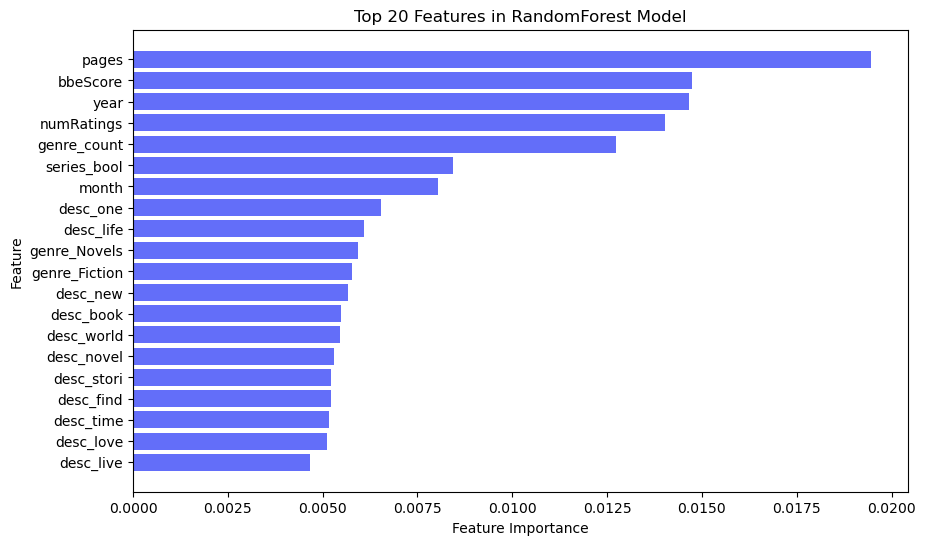

In [33]:
# Find feature importances
feature_importances = rf_model.feature_importances_

# Get feature names 
feature_names = X_train.columns if hasattr(X_train, 'columns') else np.arange(X_train.shape[1])

# Sorting the features by importance
sorted_idx = np.argsort(feature_importances)[-20:]  # Get indices of top 20 features
sorted_importances = feature_importances[sorted_idx]
sorted_features = [feature_names[i] for i in sorted_idx]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='#636EF9')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 20 Features in RandomForest Model")
plt.show()

##### Classification Report & Confusion Matrix

What are we looking at here?
- Recall: This metric assesses the model's ability to correctly identify all instances of the positive class.
- Precision: This reflects the likelihood that a data point identified by the model as positive actually belongs to the positive class.
- F1-score: a measure that combines recall and precision to provide a single score for the model's overall performance.

**Reference:** BrainStation's Precision and Recall notebook.

              precision    recall  f1-score   support

           0       0.74      0.25      0.37      3968
           1       0.57      0.92      0.70      4293

    accuracy                           0.60      8261
   macro avg       0.65      0.58      0.54      8261
weighted avg       0.65      0.60      0.54      8261



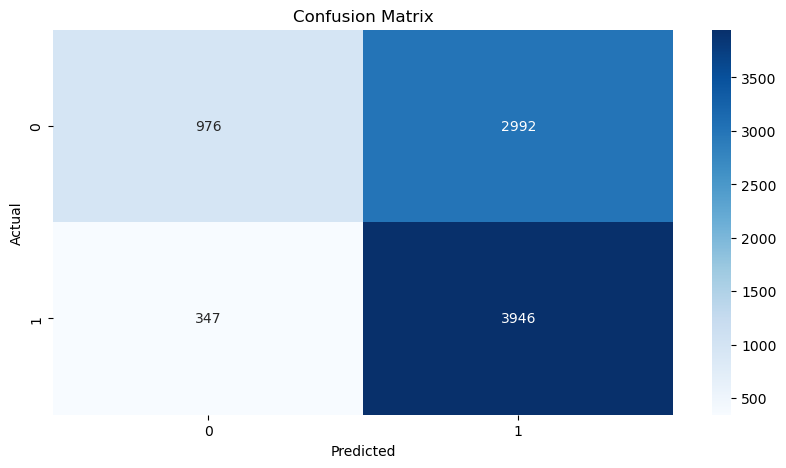

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

# Classification report
print(classification_report(y_test, y_pred_RFC))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_RFC)

# Confusion matrix heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Insights:

- This seems to have had the biggest impact on accuracy score, with it being 57 percent.
- The recall score for class 0 is still very low, at 0.24. Hopefully with further grid searching, at least one of the models will see an increase here.

<a id = 'summary'></a>
## Summary & Insights

This notebook documents our continued efforts in feature engineering, with a specific focus on enhancing the book descriptions and publisher information. We incorporated:
- Text Preprocessing and TF-IDF Vectorization techniques, selectively retaining the most significant 400 words from the descriptions. 
- Data from the top 20 publishers, selected based on their occurrence frequency. This refined approach aims to extract more meaningful insights from the textual data, thereby enhancing its predictive power in relation to book ratings.

Preliminary results, particularly from the Random Forest Model, suggest that these feature engineering efforts have positively impacted the model's performance. 

Moving forward, the plan is to revisit and refine our advanced models. We will employ grid search techniques to fine-tune these models, followed by a comparative analysis to assess their effectiveness. This iterative process of model enhancement is anticipated to yield a more robust and accurate book recommendation system.

[Back to the top](#title)